In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.metrics import mean_squared_error


path = "/home/cloudap/share/tc_yanchen/"
train = pd.read_table(path + "train_20171215.txt", engine="python")
test_A = pd.read_table(path + "test_A_20171225.txt", engine="python")
sample_A = pd.read_table(path + "sample_A_20171225.txt", engine="python", 
header=None)
# print train['cnt'].describe()
train['25%'] = 221
train['50%'] = 351
train['75%'] = 496
# print train
# print(mean_squared_error(train['cnt'], train['25%']))
# print(mean_squared_error(train['cnt'], train['50%']))
# print(mean_squared_error(train['cnt'], train['75%']))
train = train.groupby(['date', 'day_of_week'], 
as_index=False).cnt.sum()
# print train.shape
# plt.plot(train['day_of_week'], train['cnt'], "*")
# plt.show()

# for i in xrange(1, 8):
#     tmp = train[train['day_of_week'] == i]
#     plt.subplot(7, 1, i)
#     plt.plot(tmp['date'], tmp['cnt'], "*", 
#     label="Week of {0}".format(i))
# plt.show()

xx_train, xx_test = train_test_split(
train, test_size=0.3, random_state=0)
# print xx_train.shape
# print xx_test.shape

#method 1: mean method.
#the predict value is the mean
#value of the week of day.
#the mse total is large and the
# mse of per week of day is not stable,
#so this method is not good.
xx_train = xx_train.groupby(['day_of_week'], 
as_index=False).cnt.mean()
# print xx_train
xx_result = pd.merge(xx_test, xx_train, 
on=['day_of_week'], how='left')
# print xx_result
print "Total mse: %s" %mean_squared_error(xx_result['cnt_x'], 
xx_result['cnt_y'])

for i in xrange(1, 8):
    tmp = xx_result[xx_result['day_of_week'] == i]
    print "Week day %s, mse: %s" %(i, mean_squared_error(
    tmp['cnt_x'], tmp['cnt_y']))
    
    

Total mse: 1022832.25237
Week day 1, mse: 876925.591483
Week day 2, mse: 626592.193131
Week day 3, mse: 669263.50717
Week day 4, mse: 1385002.51616
Week day 5, mse: 783455.177539
Week day 6, mse: 337674.379713
Week day 7, mse: 5170801.2938


In [2]:
#method 2: weighted mean method.
#the predict value is the wighted mean
#value of the week of day.
#the mse total is large and the
# mse of per week of day is not stable,
#so this method is not good.
xx_train, xx_test = train_test_split(
train, test_size=0.3, random_state=0)
xx_train['weight'] = ((xx_train['date']+1) / len(xx_train))**6
# print xx_train
def xx(df):
    df['w_cnt'] = (df['cnt'] * df['weight']).sum() / sum(df['weight'])
    return df
xx_train = xx_train.groupby(['day_of_week'],
as_index=False).apply(xx).reset_index()
# print xx_train
xx_train = xx_train.groupby(['day_of_week'], 
as_index=False).w_cnt.mean()
# print xx_train
xx_result = pd.merge(xx_test, xx_train, on=['day_of_week'], 
how='left')
# print xx_result

print "Total mse: %s" %mean_squared_error(xx_result['cnt'], 
xx_result['w_cnt'])

for i in xrange(1, 8):
    tmp = xx_result[xx_result['day_of_week'] == i]
    print "Week day %s, mse: %s" %(i, mean_squared_error(
    tmp['cnt'], tmp['w_cnt']))

Total mse: 1229894.18915
Week day 1, mse: 1161268.05709
Week day 2, mse: 1436128.27599
Week day 3, mse: 688204.062973
Week day 4, mse: 1351972.82454
Week day 5, mse: 809101.772461
Week day 6, mse: 329854.822688
Week day 7, mse: 5875097.39913


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


[1]	valid_0's l2: 1.43444e+06
Training until validation scores don't improve for 15 rounds.
[2]	valid_0's l2: 1.37794e+06
[3]	valid_0's l2: 1.33238e+06
[4]	valid_0's l2: 1.28721e+06
[5]	valid_0's l2: 1.24901e+06
[6]	valid_0's l2: 1.21316e+06
[7]	valid_0's l2: 1.18507e+06
[8]	valid_0's l2: 1.15834e+06
[9]	valid_0's l2: 1.13562e+06
[10]	valid_0's l2: 1.11439e+06
[11]	valid_0's l2: 1.09622e+06
[12]	valid_0's l2: 1.0796e+06
[13]	valid_0's l2: 1.06997e+06
[14]	valid_0's l2: 1.06465e+06
[15]	valid_0's l2: 1.04732e+06
[16]	valid_0's l2: 1.04314e+06
[17]	valid_0's l2: 1.03095e+06
[18]	valid_0's l2: 1.01599e+06
[19]	valid_0's l2: 1.00688e+06
[20]	valid_0's l2: 998142
[21]	valid_0's l2: 987944
[22]	valid_0's l2: 978261
[23]	valid_0's l2: 973871
[24]	valid_0's l2: 965231
[25]	valid_0's l2: 960349
[26]	valid_0's l2: 955705
[27]	valid_0's l2: 951317
[28]	valid_0's l2: 945409
[29]	valid_0's l2: 943607
[30]	valid_0's l2: 936238
[31]	valid_0's l2: 934694
[32]	valid_0's l2: 930426
[33]	valid_0's l2: 92

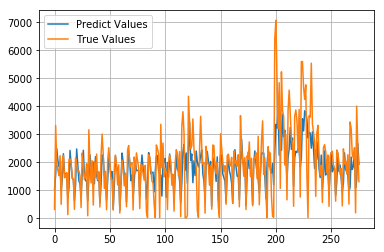

In [3]:
#method 3: https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/?spm=5176.9876270.0.0.65d515bIkvLXs
#
from pandas import DataFrame
from pandas import concat
import lightgbm as lgb


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# print train
time_cnt = list(train['cnt'].values)
time2sup = series_to_supervised(
data=time_cnt, n_in=276, dropnan=True)
# print time2sup
gbm0 = lgb.LGBMRegressor(objective="regression",
        num_leaves=64, learning_rate=0.05, 
        n_estimators=10000)
x_train = time2sup[time2sup.index < 755]
x_test = time2sup[time2sup.index > 755]
y_train = x_train.pop('var1(t)')
y_test = x_test.pop('var1(t)')
gbm0.fit(x_train.values, y_train, eval_set=[(x_test.values,y_test)], 
        eval_metric='mse',early_stopping_rounds=15)
# print "lightgbm: %s" %gbm0.predict(x_test.values)
line1 = plt.plot(range(len(x_test)), gbm0.predict(x_test.values), 
                label="Predict Values")
line2 = plt.plot(range(len(x_test)), y_test.values, 
                label="True Values")
plt.legend(loc="upper left")
plt.grid()
plt.show()



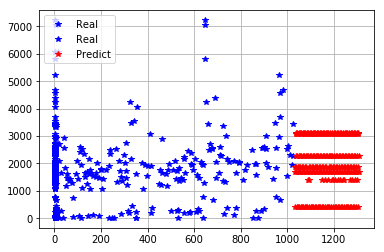

In [81]:
#method 4: gradient boosting decision tree.
#
from copy import deepcopy
from sklearn import cross_validation
from sklearn.ensemble import GradientBoostingRegressor
action1 = train.groupby(['date', 'day_of_week'], 
        as_index=False).cnt.sum()
# print action1
df_train_target = action1['cnt'].values
# print df_train_target
df_train_data = action1.drop(['cnt'], axis=1).values
# print df_train_data
cv = cross_validation.ShuffleSplit(len(df_train_data), 
    n_iter=5, test_size=0.2, random_state=0)

i = 0
predict = list()
for tr, te in cv:
    i += 1
    gbdt = GradientBoostingRegressor()
    gbdt.fit(df_train_data[tr], df_train_target[tr])
#     result = gbdt.predict(df_train_data[te])
#     print "mse: {0}".format(mean_squared_error(
#     result, df_train_target[te]))
#     print "-------------------"
    predict.append(gbdt.predict(test_A))    
predict = np.array(predict).T
results = np.mean(predict, axis=1, dtype=int)
    
plt.plot(df_train_data[te], df_train_target[te], "b*", label="Real")
plt.plot(test_A['date'], results, "r*", label="Predict")
plt.legend(loc="upper left")
plt.grid()
plt.show()

df_results = deepcopy(test_A)
df_results['cnt'] = results
df_results.drop(['day_of_week'], axis=1).to_csv("/home/cloudap/share/tc_yanchen/result.txt",
              index=False, header=False, sep="\t")    
    